In [17]:
!pip install -r ..\salma_deployment\requirements.txt

In [61]:
import streamlit as st
import pickle
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import shap

In [4]:

# Load the models and transformers
with open('salma_log_reg.pkl', 'rb') as file:
    log_reg = pickle.load(file)

with open('salma_xgb_model.pkl', 'rb') as file:
    xgb_model = pickle.load(file)

with open('salma_vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

with open('salma_scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)
    

In [6]:
def load_functions(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

functions_dict = load_functions('salma_functions.pkl')
print("Functions Loaded:", functions_dict)

clean_text_func = functions_dict['clean_text']
collect_headlines_func = functions_dict['collect_headlines']
fetch_spy_data_func = functions_dict['fetch_spy_data']


Functions Loaded: {'clean_text': <function clean_text at 0x0000021C44A0ECA0>, 'collect_headlines': <function collect_headlines at 0x0000021C44A0EC00>, 'fetch_spy_data': <function fetch_spy_data at 0x0000021C44A0F6A0>}


In [8]:

# Streamlit app layout
st.title('Stock Movement Prediction')

# User inputs
# Convert to DataFrame
df_headlines = pd.DataFrame(collect_headlines_func())
# Apply clean_text function to the 'text' column
df_headlines['cleaned_text'] = df_headlines['text'].apply(clean_text_func)


2024-08-20 09:10:59.139 
  command:

    streamlit run C:\Anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
[nltk_data] Downloading package punkt to nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_dat

In [126]:

# Select the 'text' column
text_input = df_headlines['cleaned_text']


open_price_data = fetch_spy_data_func(datetime.datetime.now())
text_tfidf = vectorizer.transform(text_input)

In [128]:

if st.button('Predict'):
    # Transform the input
    
    feature_names = vectorizer.get_feature_names_out()
     # Extract the 'Open' price from the fetched data
    open_price_input = open_price_data[0]['Open']
        
        # Transform the opening price, reshape to 2D array
    open_scaled = scaler.transform(np.array([[open_price_input]]))
    
    # Make predictions
    text_prediction = log_reg.predict(text_tfidf)
    open_prediction = xgb_model.predict(open_scaled)
    
    # Combine predictions
    combined_prediction = (text_prediction[0] + open_prediction[0]) / 2
    final_prediction = int(np.round(combined_prediction))
    
    st.write(f'Predicted Movement: {"Up" if final_prediction == 1 else "Down"}')

In [130]:
text_tfidf

<10x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [132]:
# Display the headlines
st.write("### News Headlines")
st.dataframe(df_headlines[['text']])

DeltaGenerator()

In [134]:
text_input

0    treasury yields hover investors await fed updates
1    fed survey shows lows employment worries findi...
2    goldman sachs cuts odds us recession retail jo...
3    treasury yields slide ahead fed minutes jackso...
4    trump harris inflation arguments questionable ...
5    harris economic plan us family childcare crisi...
6    big fastcasual restaurant chains rapidly expan...
7    weeks worth huge economic news impact feds dec...
8    treasury yields fell investors absorbed weeks ...
9             heres deflation breakdown july one chart
Name: cleaned_text, dtype: object

In [136]:
feature_names

array(['account', 'accus', 'act', 'action', 'activ', 'activist', 'ad',
       'add', 'administr', 'advertis', 'advis', 'affect', 'age', 'agenc',
       'agenda', 'agre', 'agreement', 'ahead', 'aid', 'aim', 'air',
       'airbu', 'aircraft', 'airlin', 'airport', 'airway', 'alibaba',
       'alleg', 'allianc', 'allow', 'almost', 'alphabet', 'amazon',
       'america', 'american', 'amid', 'among', 'analyst', 'announc',
       'annual', 'anoth', 'anti', 'antitrust', 'app', 'appeal', 'appl',
       'appoint', 'approv', 'april', 'arabia', 'aramco', 'around',
       'arrest', 'asda', 'asia', 'ask', 'asset', 'attack', 'australia',
       'australian', 'auto', 'automak', 'aviat', 'avoid', 'away', 'back',
       'bad', 'bailout', 'ban', 'bank', 'banker', 'bankruptci', 'barclay',
       'base', 'batteri', 'battl', 'bayer', 'bear', 'beat', 'becom',
       'begin', 'behind', 'benefit', 'best', 'bet', 'better', 'beyond',
       'bid', 'big', 'biggest', 'bill', 'billion', 'billionair',
       'bitcoi

In [138]:
df_headlines[['text']]

,text
0,Treasury yields hover as investors await Fed u...
1,"Fed survey shows lows in employment, worries a..."
2,Goldman Sachs cuts odds of U.S. recession to 2...
3,Treasury yields slide ahead of Fed minutes and...
4,"Trump, Harris inflation arguments are question..."
5,"With Harris economic plan, U.S. family and chi..."
6,Big fast-casual restaurant chains are rapidly ...
7,How a week's worth of huge economic news will ...
8,Treasury yields fell as investors absorbed wee...
9,Here's the deflation breakdown for July 2024 —...


In [140]:
open_price_data

[{'Date': Timestamp('2024-08-20 00:00:00-0400', tz='America/New_York'),
  'Open': 559.1500244140625}]

In [142]:
open_price_data[0]['Date']

Timestamp('2024-08-20 00:00:00-0400', tz='America/New_York')

<Figure size 1000x800 with 0 Axes>

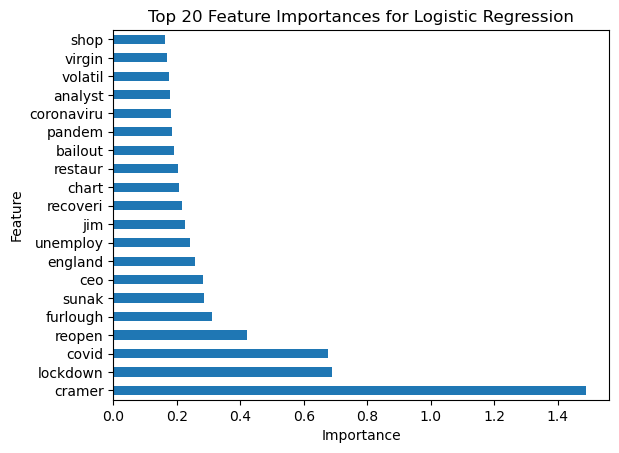

In [144]:
%matplotlib inline
# Feature Importance for Logistic Regression
coefficients = log_reg.coef_.flatten()
importance = np.abs(coefficients)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance for Logistic Regression
plt.figure(figsize=(10, 8))
importance_df.head(20).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title('Top 20 Feature Importances for Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [146]:
result=""
result= result.join(text_input)

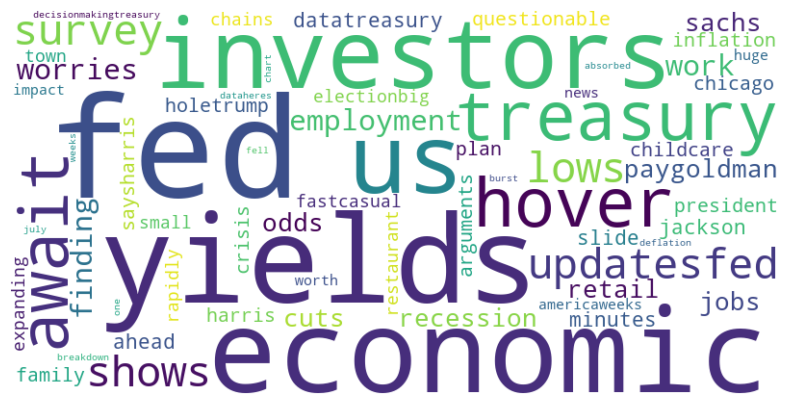

In [148]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(result)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [158]:
# Create the explainer with the summarized background data
explainer_log = shap.LinearExplainer(log_reg, text_tfidf)

In [160]:
# Compute SHAP values for the first 100 samples of the test data
shap_values_log = explainer_log.shap_values(text_tfidf)

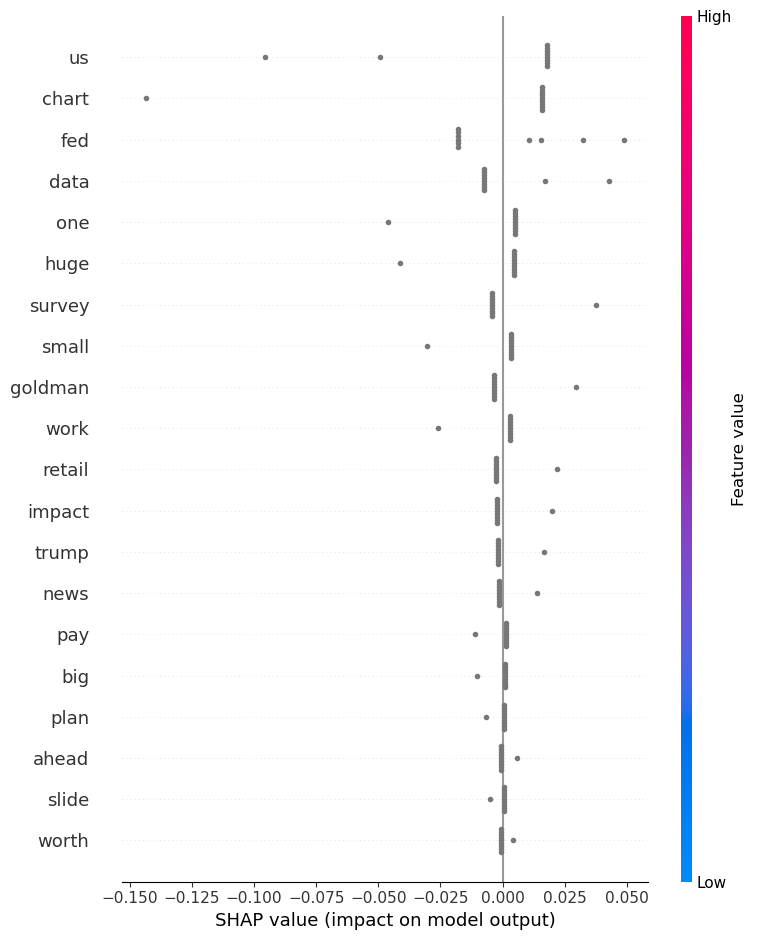

In [164]:

# Plot the summary of SHAP values
shap.summary_plot(shap_values_log, text_tfidf,feature_names=vectorizer.get_feature_names_out(), show=False)


In [174]:
instance_index = st.number_input(
    'Enter the instance index (0 to {})'.format(len(df_headlines) - 1),
    min_value=0,
    max_value=max(len(df_headlines) - 1, 10),
    value=10,
    step=1
)

# Ensure the instance_index does not exceed the number of samples
instance_index = min(instance_index, len(df_headlines) - 1)

In [176]:
# Compute SHAP values for a specific instance (e.g., first instance in test data)
shap_values_instance = explainer_log.shap_values(text_tfidf[instance_index].toarray())

# Draw the SHAP force plot for the instance
shap.force_plot(explainer_log.expected_value, shap_values_instance, text_tfidf[instance_index].toarray(), feature_names=vectorizer.get_feature_names_out())
